# IF3170 Artificial Intelligence | Tugas Besar 2

This notebook serves as a template for the assignment. Please create a copy of this notebook to complete your work. You can add more code blocks, markdown blocks, or new sections if needed.

Group Members:
1. Wijaksara Aptaluhung (18223088)
2. Inggried Amelia Deswanty (18223935)
3. Persada Ramiiza Abyudaya (18223033)
4. Wisa Ahmaduta Dinutama (18223003)

## Import Libraries

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import json
import time
import warnings

from collections import Counter
from sklearn.impute import KNNImputer as SklearnKNNImputer
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix

pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
np.random.seed(42)
warnings.filterwarnings("ignore", category=FutureWarning)
plt.style.use('ggplot')

print("Libraries imported successfully!")


Libraries imported successfully!


## Import Dataset

In [3]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

train_ids = train['ID'].values
test_ids = test['ID'].values

y_train = train['is_fraud'].values

print(f"Train shape: {train.shape}")
print(f"Test shape: {test.shape}")

Train shape: (100000, 31)
Test shape: (100000, 30)


In [4]:
print("Train shape:", train.shape)
train.head()

Train shape: (100000, 31)


,ID,transaction_id,user_id,age,gender,country,device_type,device_os,merchant_category,transaction_amount,transaction_type,time_of_day,day_of_week,transaction_duration,num_prev_transactions,avg_transaction_amount,std_transaction_amount,transactions_last_24h,transactions_last_1h,failed_login_attempts,ip_risk_score,device_trust_score,account_age_days,has_chargeback_history,shared_ip_users,shared_device_users,merchant_risk,country_risk,distance_from_home,is_new_country,is_fraud
0,0,T0065716,15307,35,M,UK,mobile,Android,clothing,17.70,purchase,18,1,3.04,34,91.01,56.68,0,0,1,0.464,0.793,1056,0,1,1,0.10,0.04,9.66,0,1
1,1,T0027857,1226,54,F,IN,mobile,Android,restaurants,NaN,purchase,7,3,0.33,28,NaN,50.11,1,0,0,0.997,NaN,1867,0,1,1,0.12,0.10,12.05,0,1
2,2,T0055953,16072,35,M,US,desktop,iOS,restaurants,5.20,purchase,15,5,7.85,31,111.05,20.79,3,0,0,0.940,0.281,1726,1,2,2,0.12,0.05,181.28,0,0
3,3,T0083660,725,23,F,US,mobile,Android,electronics,180.70,purchase,18,3,4.71,32,27.88,73.32,3,0,0,0.166,0.061,30,1,1,1,0.30,0.05,33.26,0,0
4,4,T0017674,7367,32,M,UK,mobile,Android,gas,35.45,purchase,8,3,1.56,21,81.34,73.28,0,0,0,0.870,0.592,1386,0,3,1,0.05,0.04,174.83,0,0


In [5]:
print("\nTest shape:", test.shape)
test.head()


Test shape: (100000, 30)


,ID,transaction_id,user_id,age,gender,country,device_type,device_os,merchant_category,transaction_amount,transaction_type,time_of_day,day_of_week,transaction_duration,num_prev_transactions,avg_transaction_amount,std_transaction_amount,transactions_last_24h,transactions_last_1h,failed_login_attempts,ip_risk_score,device_trust_score,account_age_days,has_chargeback_history,shared_ip_users,shared_device_users,merchant_risk,country_risk,distance_from_home,is_new_country
0,0,T0065716,1199,58,M,UK,tablet,Android,gas,3.54,topup,6,0,4.03,42,102.55,55.15,2,0,0,0.906,0.595,2305,0,3,3,0.05,0.04,13.55,0
1,1,T0027857,29841,71,M,BR,desktop,Android,groceries,94.80,transfer,17,0,15.68,20,40.50,70.61,2,0,0,0.917,0.553,2911,0,3,3,0.05,0.13,6.09,0
2,2,T0055953,25403,76,F,CA,tablet,iOS,restaurants,84.45,transfer,18,0,0.13,32,80.61,77.97,2,1,0,0.675,0.614,2952,0,1,1,0.12,0.03,118.59,0
3,3,T0083660,27600,70,F,UK,mobile,iOS,gas,23.66,topup,20,4,3.75,34,7.48,19.61,4,0,0,0.541,0.493,2539,0,2,2,0.05,0.04,255.86,0
4,4,T0017674,21543,70,F,US,mobile,Windows,travel,81.45,transfer,18,2,6.55,32,88.94,54.31,1,1,0,0.832,0.183,1017,0,1,2,0.35,0.05,16.19,0


# Exploratory Data Analysis (Optional)

Exploratory Data Analysis (EDA) is a crucial step in the data analysis process that involves examining and visualizing data sets to uncover patterns, trends, anomalies, and insights. It is the first step before applying more advanced statistical and machine learning techniques. EDA helps you to gain a deep understanding of the data you are working with, allowing you to make informed decisions and formulate hypotheses for further analysis.

### Data Understanding
The purpose of this section is to help participants understand the quality and initial characteristics of the provided data. This is a core part of Exploratory Data Analysis (EDA), which aims to assess the structure and completeness of the data, identify patterns, anomalies, and potential issues, understand relationships between variables, and determine the appropriate next steps for preprocessing or modeling.


### PART 1:
1. The dataset size shows how many rows and columns you have, helping you understand the amount of data.
2. The data types show how each feature should be handled, such as numbers or categories.
3. The count of unique values in categorical features shows how many different categories there are.
4. The basic statistics for numerical features show the range and spread of the data, helping you spot patterns or outliers.

##### 1.1. Data Size

In [6]:
size = train.shape
print(f"Data Size: {size[0]} instances, {size[1]} features")

Data Size: 100000 instances, 31 features


##### 1.2 Data Type & Information

In [7]:
# Menampilkan informasi tentang struktur DataFrame
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 31 columns):
 #   Column                  Non-Null Count   Dtype  
---  ------                  --------------   -----  
 0   ID                      100000 non-null  int64  
 1   transaction_id          100000 non-null  object 
 2   user_id                 100000 non-null  int64  
 3   age                     100000 non-null  int64  
 4   gender                  100000 non-null  object 
 5   country                 100000 non-null  object 
 6   device_type             100000 non-null  object 
 7   device_os               100000 non-null  object 
 8   merchant_category       100000 non-null  object 
 9   transaction_amount      97581 non-null   float64
 10  transaction_type        100000 non-null  object 
 11  time_of_day             100000 non-null  int64  
 12  day_of_week             100000 non-null  int64  
 13  transaction_duration    100000 non-null  float64
 14  num_prev_transactions

In [8]:
train.describe()

,ID,user_id,age,transaction_amount,time_of_day,day_of_week,transaction_duration,num_prev_transactions,avg_transaction_amount,std_transaction_amount,transactions_last_24h,transactions_last_1h,failed_login_attempts,ip_risk_score,device_trust_score,account_age_days,has_chargeback_history,shared_ip_users,shared_device_users,merchant_risk,country_risk,distance_from_home,is_new_country,is_fraud
count,100000.000000,100000.000000,100000.000000,97581.000000,100000.000000,100000.000000,100000.000000,100000.00000,97581.000000,100000.000000,100000.000000,100000.00000,100000.000000,100000.000000,97581.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000,100000.000000
mean,49999.500000,15040.173180,48.484150,126.855288,12.770160,2.780700,3.999587,29.99208,69.969722,42.541209,2.040150,0.30923,0.298110,0.500395,0.499480,1497.325540,0.060270,2.000770,1.499800,0.192980,0.071324,117.411584,0.049580,0.141280
std,28867.657797,8655.074007,17.892168,376.035544,5.748626,2.064754,4.012831,5.48621,29.961530,21.652791,3.967414,1.46423,0.546208,0.288944,0.288812,866.004305,0.237988,1.414676,1.225885,0.134019,0.033203,212.016312,0.217077,0.348312
min,0.000000,1.000000,18.000000,0.010000,0.000000,0.000000,0.000000,8.00000,-52.890000,5.000000,0.000000,0.00000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.050000,0.020000,0.000000,0.000000,0.000000
25%,24999.750000,7549.000000,33.000000,26.910000,8.000000,1.000000,1.150000,26.00000,49.780000,23.860000,1.000000,0.00000,0.000000,0.250000,0.249000,745.000000,0.000000,1.000000,1.000000,0.080000,0.040000,29.620000,0.000000,0.000000
50%,49999.500000,15093.000000,48.000000,64.460000,12.000000,3.000000,2.760000,30.00000,69.990000,42.480000,1.000000,0.00000,0.000000,0.501000,0.499000,1496.000000,0.000000,2.000000,1.000000,0.120000,0.050000,71.810000,0.000000,0.000000
75%,74999.250000,22541.000000,64.000000,131.060000,18.000000,5.000000,5.540000,34.00000,90.250000,61.310000,2.000000,0.00000,1.000000,0.751000,0.750000,2244.000000,0.000000,3.000000,2.000000,0.300000,0.100000,144.440000,0.000000,0.000000
max,99999.000000,29999.000000,79.000000,20601.133350,23.000000,6.000000,52.070000,59.00000,195.790000,80.000000,44.000000,15.00000,5.000000,1.000000,1.000000,2999.000000,1.000000,11.000000,11.000000,0.550000,0.130000,6388.517628,1.000000,1.000000


##### 1.2.1. Categorical Features

In [9]:
import numpy as np
import pandas as pd

exclude = {'NoOfURLRedirect', 'NoOfSelfRedirect', 'FILENAME', 'URL', 'Domain', 'Title', 'transaction_id'}

num_cols = train.select_dtypes(include=[np.number]).columns
binary_like = [
    c for c in num_cols
    if set(train[c].dropna().unique()).issubset({0, 1})
]

cat_cols = train.select_dtypes(include=['object', 'category']).columns.tolist()

all_categorical = [c for c in (binary_like + cat_cols) if c in train.columns and c not in exclude]

for special in ('label', 'attack_cat'):
    if special in train.columns and special not in all_categorical:
        all_categorical.append(special)

# 5) table of unique counts for those features
unique_values2 = (
    train[all_categorical]
    .nunique(dropna=True)
    .rename_axis('Feature')
    .reset_index(name='Unique Value')
)

unique_values2.index = pd.RangeIndex(start=1, stop=len(unique_values2) + 1)



print('Detected binary-like numeric columns:', binary_like)
print('Categorical features considered (after exclusion):', all_categorical)
print('\nNumber of Unique Values for Categorical Features:')
unique_values2


Detected binary-like numeric columns: ['has_chargeback_history', 'is_new_country', 'is_fraud']
Categorical features considered (after exclusion): ['has_chargeback_history', 'is_new_country', 'is_fraud', 'gender', 'country', 'device_type', 'device_os', 'merchant_category', 'transaction_type']

Number of Unique Values for Categorical Features:


,Feature,Unique Value
1,has_chargeback_history,2
2,is_new_country,2
3,is_fraud,2
4,gender,2
5,country,10
6,device_type,3
7,device_os,5
8,merchant_category,9
9,transaction_type,4


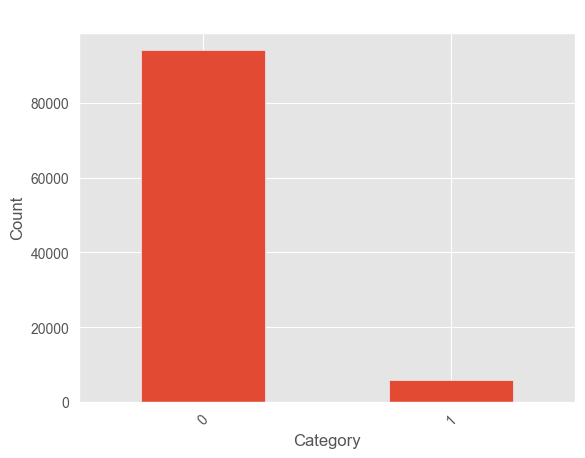

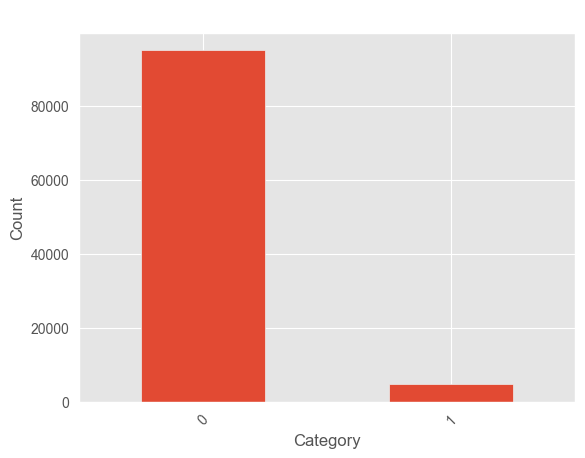

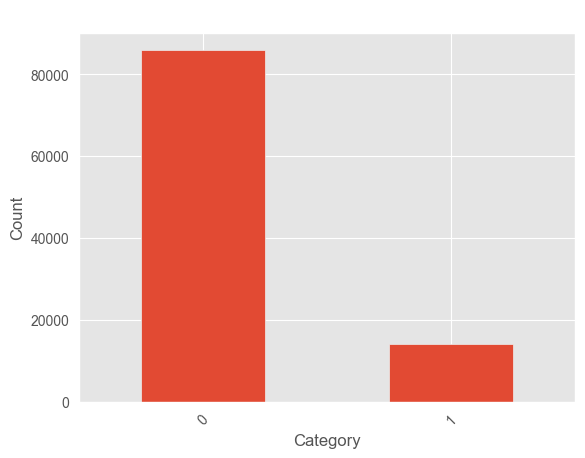

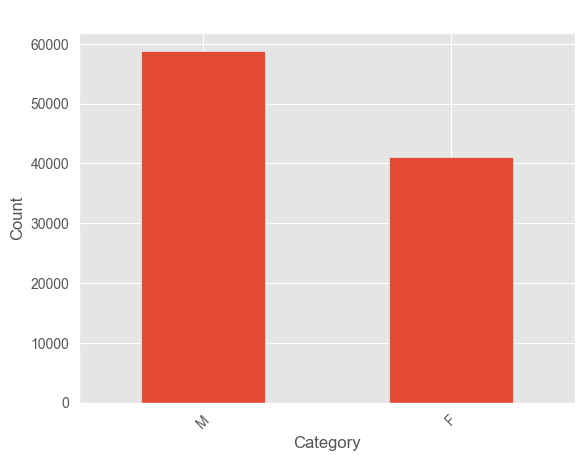

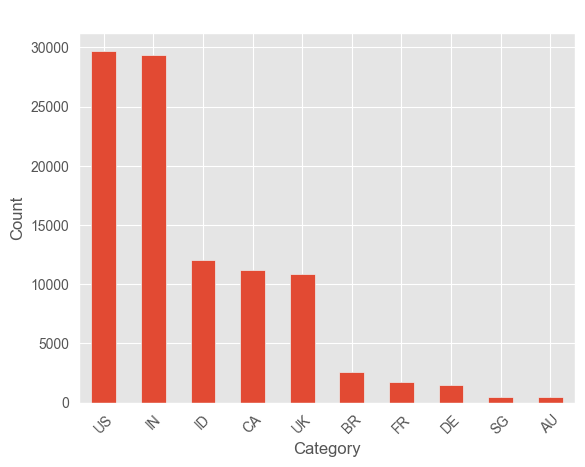

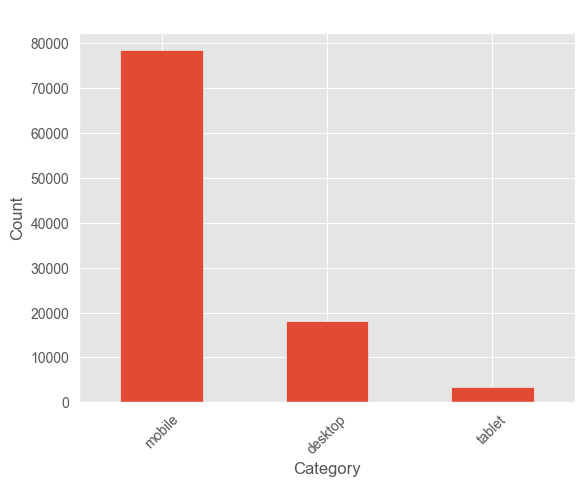

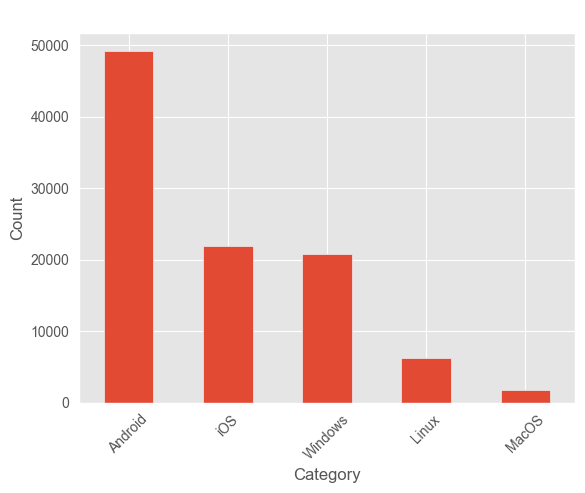

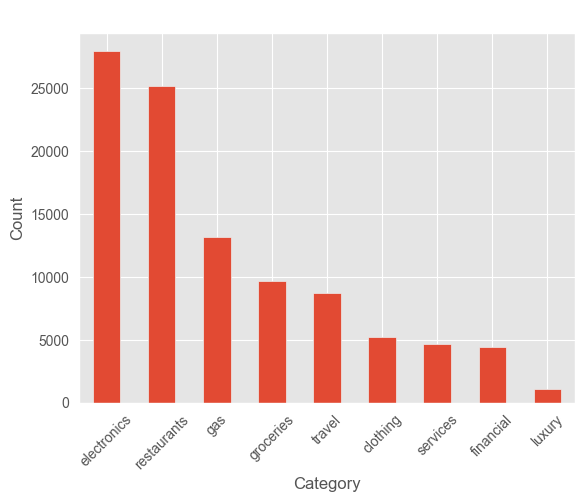

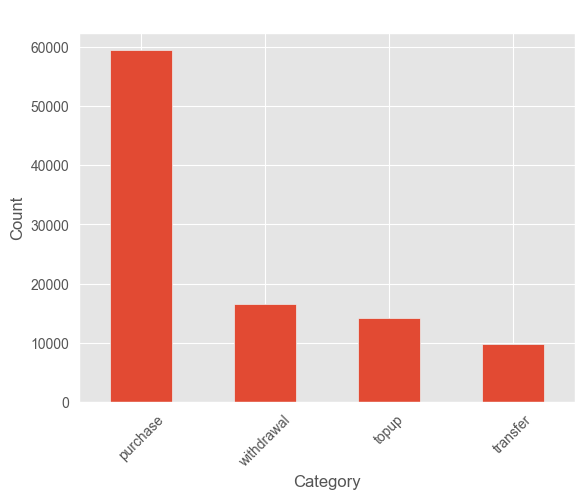

In [10]:
import matplotlib.pyplot as plt

for col in all_categorical:
    plt.figure()
    train[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xlabel("Category")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()


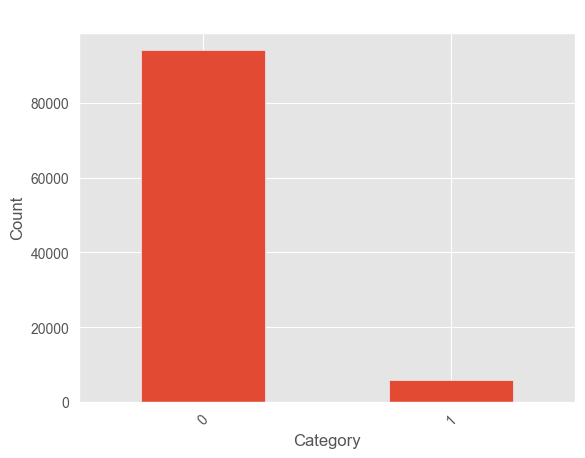

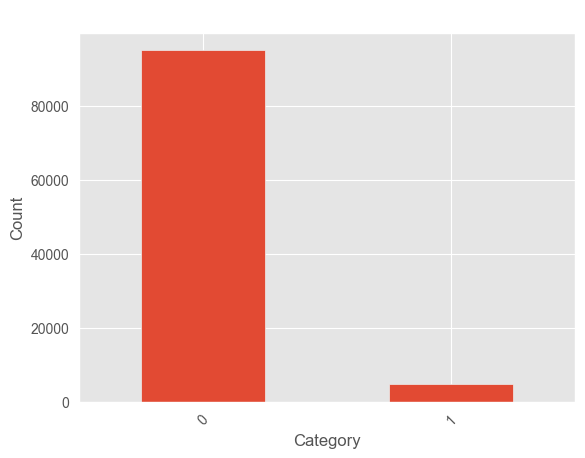

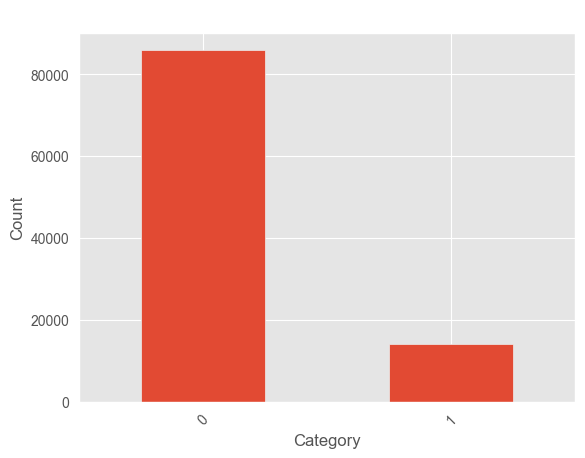

In [11]:
import matplotlib.pyplot as plt

for col in binary_like:
    plt.figure()
    train[col].value_counts().plot(kind='bar')
    plt.title(col)
    plt.xlabel("Category")
    plt.ylabel("Count")
    plt.xticks(rotation=45)
    plt.show()


##### 1.2.2. Numerical Features

In [12]:
# Identify numeric columns
num_cols = train.select_dtypes(include=[np.number]).columns.tolist()

exclude_cols = [c for c in ['NoOfURLRedirect', 'NoOfSelfRedirect', 'FILENAME', 'URL', 'Domain', 'Title', 'id', 'ID'] if c in train.columns]
for t in ['label', 'attack_cat']:
    if t in train.columns and t not in exclude_cols:
        exclude_cols.append(t)

numerical_features = [c for c in num_cols if c not in set(binary_like) and c not in set(exclude_cols)]

if len(numerical_features) == 0:
    print('Warning: no numeric features found after exclusions — falling back to all numeric columns.')
    numerical_features = num_cols

unique_num = train[numerical_features].nunique(dropna=True)
unique_num_df = pd.DataFrame(unique_num, columns=['Unique Values']).reset_index()
unique_num_df.rename(columns={'index': 'Feature'}, inplace=True)
unique_num_df.index = pd.RangeIndex(1, len(unique_num_df) + 1)

print('Numeric columns considered (after exclusions):')
print(numerical_features)

unique_num_df

Numeric columns considered (after exclusions):
['user_id', 'age', 'transaction_amount', 'time_of_day', 'day_of_week', 'transaction_duration', 'num_prev_transactions', 'avg_transaction_amount', 'std_transaction_amount', 'transactions_last_24h', 'transactions_last_1h', 'failed_login_attempts', 'ip_risk_score', 'device_trust_score', 'account_age_days', 'shared_ip_users', 'shared_device_users', 'merchant_risk', 'country_risk', 'distance_from_home']


,Feature,Unique Values
1,user_id,28918
2,age,62
3,transaction_amount,28920
4,time_of_day,24
5,day_of_week,7
6,transaction_duration,2448
7,num_prev_transactions,49
8,avg_transaction_amount,14709
9,std_transaction_amount,7501
10,transactions_last_24h,45


#### 1.3. Statistik Deskriptif

In [13]:
# Summary statistics for numerical features
summary_stats = df[numerical_features].describe().transpose()
summary_stats = summary_stats[['min', 'max', 'mean', '50%', 'std']]
summary_stats.rename(columns={'50%': 'median'}, inplace=True)
summary_stats.index = range(1, len(summary_stats) + 1)

print("Summary Statistics for Numerical Features:")
summary_stats

NameError: name 'df' is not defined

### PART 2:
1. Identify how many missing or empty values each feature has.
2. Detect any unusual or extreme values in each feature.

##### 2.1 Missing Values

In [ ]:
# Count and percentage of missing values
missing_count = df.isna().sum().sort_values(ascending=False)
missing_pct = df.isna().mean().sort_values(ascending=False) * 100

# DataFrame Summart
missing_df = pd.DataFrame({
    'Missing Count': missing_count,
    'Missing %': missing_pct.round(2)
})
missing_df = missing_df[missing_df['Missing Count'] > 0] 

print("Missing Values Summary:")
print(missing_df)

In [ ]:
if len(missing_df) > 0:
    plt.figure(figsize=(10, 5))    
    colors = sns.color_palette("Reds_r", len(missing_df))
    bars = plt.barh(missing_df.index, missing_df['Missing %'], color=colors, edgecolor='black')
    
    for bar, pct in zip(bars, missing_df['Missing %']):
        plt.text(bar.get_width() + 0.1, bar.get_y() + bar.get_height()/2, 
                 f'{pct:.2f}%', va='center', fontsize=10)
    
    plt.xlabel('Missing Percentage (%)', fontsize=12)
    plt.ylabel('Feature', fontsize=12)
    plt.title('Missing Values by Feature', fontsize=14)
    plt.xlim(0, max(missing_df['Missing %']) * 1.3)
    plt.gca().invert_yaxis()
    plt.tight_layout()
    plt.show()
    
    print(f"\nTotal features with missing values: {len(missing_df)}")
    print(f"Total missing entries: {missing_df['Missing Count'].sum():,}")
else:
    print("No missing values found in the dataset!")

##### 2.2 Outliers

In [ ]:
def plot_outliers(dataframe, n_cols=3, subplot_size=(5, 3)):
    numerical_cols = dataframe.columns
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    colors = sns.color_palette("Reds_r", len(numerical_cols))
    
    plt.figure(figsize=(subplot_size[0] * n_cols, subplot_size[1] * n_rows))
    for i, col in enumerate(numerical_cols):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.boxplot(y=dataframe[col], color=colors[i])
        plt.title(f'{col}', fontsize=10)
        plt.ylabel('')
    plt.suptitle('Outliers Detection - Boxplots for Numerical Features', fontsize=14, y=1.02)
    plt.tight_layout()
    plt.show()

plot_outliers(df[numerical_features])

In [ ]:
warnings.filterwarnings("ignore", category=FutureWarning)

def count_and_visualize_numerical_outliers(data_numerical):
    outlier_counts = {}
    for column in data_numerical.columns:
        Q1 = data_numerical[column].quantile(0.25)
        Q3 = data_numerical[column].quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        outliers = data_numerical[(data_numerical[column] < lower_bound) | (data_numerical[column] > upper_bound)]
        outlier_counts[column] = outliers.shape[0]
    
    outlier_df = pd.DataFrame(list(outlier_counts.items()), columns=["Feature", "Outliers"])
    outlier_df = outlier_df.sort_values(by="Outliers", ascending=False)
    outlier_df = outlier_df[outlier_df["Outliers"] > 0]
    
    if len(outlier_df) > 0:
        plt.figure(figsize=(12, max(6, len(outlier_df) * 0.4)))
        sns.barplot(x="Outliers", y="Feature", data=outlier_df, palette="Reds_r")
        
        for index, value in enumerate(outlier_df["Outliers"]):
            plt.text(value + 50, index, f'{value:,}', va='center', fontsize=10)
        
        plt.title("Number of Outliers per Numerical Feature (IQR Method)", fontsize=14, weight='bold')
        plt.xlabel("Number of Outliers", fontsize=12)
        plt.ylabel("Feature", fontsize=12)
        plt.grid(axis='x', linestyle='--', alpha=0.6)
        plt.tight_layout()
        plt.show()
        
        total_outliers = outlier_df['Outliers'].sum()
        print(f"\nTotal features with outliers: {len(outlier_df)}")
        print(f"Total outlier entries: {total_outliers:,}")
    else:
        print("No outliers found in the dataset!")
    
    return outlier_df

outlier_df = count_and_visualize_numerical_outliers(df[numerical_features])
outlier_df

### PART 3:
1. Determine how strongly different features are related to one another.
2. Create visual plots that show how each feature is distributed, whether it is categorical or numerical.
3. Create visualizations that show how each feature relates to the target variable.
4. Skewness analysis to measure the asymmetry of a distribution


#### 3.1. Correlations Betweenn Features

##### 3.1.1. Numerical Features Correlatiosn

In [ ]:
# Heatmap of correlations
plt.figure(figsize=(16, 12))
corr_matrix = df[numerical_features].corr()
mask = np.triu(np.ones_like(corr_matrix, dtype=bool))
sns.heatmap(corr_matrix, mask=mask, annot=True, fmt='.2f', 
            cmap='Reds', center=0, linewidths=0.5,
            annot_kws={'size': 8})
plt.title('Correlation Matrix - Numerical Features', fontsize=14, weight='bold')
plt.tight_layout()
plt.show()

corr_pairs = corr_matrix.unstack().sort_values(ascending=False)
corr_pairs = corr_pairs[corr_pairs < 1]  
print("\nTop 10 Positive Correlations:")
print(corr_pairs.head(10))
print("\nTop 10 Negative Correlations:")
print(corr_pairs.tail(10))

#### 3.2. Distribution of Features

##### 3.2.1. Numerical Features Distribution

In [ ]:
# Distribution of Numerical Features
def plot_numerical_distributions(dataframe, n_cols=3, subplot_size=(5, 4)):
    numerical_cols = dataframe.columns
    n_rows = (len(numerical_cols) + n_cols - 1) // n_cols
    colors = sns.color_palette("Reds_r", len(numerical_cols))
    
    plt.figure(figsize=(subplot_size[0] * n_cols, subplot_size[1] * n_rows))
    for i, col in enumerate(numerical_cols):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.histplot(dataframe[col], kde=True, color=colors[i], edgecolor='black', alpha=0.7)
        plt.title(f'{col}', fontsize=10)
        plt.xlabel('')
    plt.suptitle('Distribution of Numerical Features', fontsize=14, y=1.02, weight='bold')
    plt.tight_layout()
    plt.show()

plot_numerical_distributions(df[numerical_features])

##### 3.2.2. Categorical Features Distribution

In [ ]:
# Distribution of Categorical Features
def plot_categorical_distributions(dataframe, cat_features, n_cols=3, subplot_size=(5, 4), top_n=10):
    n_rows = (len(cat_features) + n_cols - 1) // n_cols
    
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(subplot_size[0] * n_cols, subplot_size[1] * n_rows))
    axes = axes.flatten() if n_rows * n_cols > 1 else [axes]
    
    for i, col in enumerate(cat_features):
        ax = axes[i]
        value_counts = dataframe[col].value_counts().head(top_n) 
        colors = sns.color_palette("Reds_r", len(value_counts))
        ax.bar(range(len(value_counts)), value_counts.values, color=colors, edgecolor='black')
        ax.set_xticks(range(len(value_counts)))
        ax.set_xticklabels(value_counts.index, rotation=45, ha='right', fontsize=8)
        ax.set_title(f'{col}', fontsize=10)
        ax.set_xlabel('')
        
        total_unique = dataframe[col].nunique()
        if total_unique > top_n:
            ax.set_xlabel(f'(showing top {top_n} of {total_unique})', fontsize=8)
    
    for j in range(len(cat_features), len(axes)):
        axes[j].set_visible(False)
    
    plt.suptitle('Distribution of Categorical Features', fontsize=14, y=1.02, weight='bold')
    plt.tight_layout()
    plt.show()

plot_categorical_distributions(df, all_categorical_features)

#### 3.3. Target Variable Distribution

In [ ]:
# Target Variable Distribution
target_col = 'is_fraud'

plt.figure(figsize=(12, 5))

# Pie chart
plt.subplot(1, 2, 1)
target_counts = df[target_col].value_counts()
colors = sns.color_palette("Reds_r", len(target_counts))
plt.pie(target_counts, labels=['Not Fraud (0)', 'Fraud (1)'], autopct='%1.1f%%', colors=colors, 
        explode=[0.02]*len(target_counts), startangle=90)
plt.title(f'Distribution of {target_col}', fontsize=12, weight='bold')

# Bar chart
plt.subplot(1, 2, 2)
sns.barplot(x=target_counts.index, y=target_counts.values, palette="Reds_r")
for i, v in enumerate(target_counts.values):
    plt.text(i, v + 500, f'{v:,}', ha='center', fontsize=10)
plt.title(f'Count of {target_col}', fontsize=12, weight='bold')
plt.xlabel(target_col)
plt.ylabel('Count')
plt.xticks([0, 1], ['Not Fraud (0)', 'Fraud (1)'])

plt.tight_layout()
plt.show()

# Imbalance ratio
print(f"\nClass Distribution:")
print(target_counts)
print(f"\nImbalance Ratio: {target_counts.max() / target_counts.min():.2f}:1")

#### 3.4. Features vs Target

##### 3.4.1. Numerical Features vs Target

In [ ]:
# Numerical Features vs Target
def plot_features_vs_target(dataframe, features, target, n_cols=3, subplot_size=(5, 4)):
    n_rows = (len(features) + n_cols - 1) // n_cols
    
    plt.figure(figsize=(subplot_size[0] * n_cols, subplot_size[1] * n_rows))
    for i, col in enumerate(features):
        plt.subplot(n_rows, n_cols, i + 1)
        sns.boxplot(x=dataframe[target], y=dataframe[col], palette="Reds_r")
        plt.title(f'{col} vs {target}', fontsize=10)
        plt.xlabel('')
    plt.suptitle(f'Numerical Features vs {target}', fontsize=14, y=1.02, weight='bold')
    plt.tight_layout()
    plt.show()

plot_features_vs_target(df, numerical_features, 'is_fraud')

##### 3.4.2. Categorical Features vs Target

In [ ]:
# Categorical Features vs Target
def plot_categorical_vs_target(dataframe, cat_features, target, n_cols=2, subplot_size=(7, 4), top_n=10):
    # Filtering
    cat_features = [c for c in cat_features if c != target]
    n_rows = (len(cat_features) + n_cols - 1) // n_cols
    colors = sns.color_palette("Reds_r", 2)
    fig, axes = plt.subplots(n_rows, n_cols, figsize=(subplot_size[0] * n_cols, subplot_size[1] * n_rows))
    axes = axes.flatten() if n_rows * n_cols > 1 else [axes]
    
    for i, col in enumerate(cat_features):
        ax = axes[i]
        
        top_categories = dataframe[col].value_counts().head(top_n).index
        df_filtered = dataframe[dataframe[col].isin(top_categories)]
        
        ct = pd.crosstab(df_filtered[col], df_filtered[target], normalize='index') * 100
        ct = ct.reindex(top_categories)  
        
        ct.plot(kind='bar', stacked=True, ax=ax, color=colors, edgecolor='black', legend=False)
        ax.set_title(f'{col} vs {target}', fontsize=10)
        ax.set_xlabel('')
        ax.set_ylabel('Percentage (%)')
        ax.tick_params(axis='x', rotation=45)
        
        total_unique = dataframe[col].nunique()
        if total_unique > top_n:
            ax.set_xlabel(f'(top {top_n} of {total_unique})', fontsize=8)
    
    for j in range(len(cat_features), len(axes)):
        axes[j].set_visible(False)
    
    handles, labels = axes[0].get_legend_handles_labels()
    fig.legend(handles, ['Not Fraud', 'Fraud'], title=target, loc='upper right', bbox_to_anchor=(0.99, 0.99))
    
    plt.suptitle(f'Categorical Features vs {target}', fontsize=14, y=1.02, weight='bold')
    plt.tight_layout()
    plt.show()

plot_categorical_vs_target(df, all_categorical_features, 'is_fraud')

##### 3.5. Skewness Analysis

In [ ]:
# Skewness Analysis
from scipy.stats import skew

# Calculate skewness for numerical features (excluding target)
skewness_data = {}
for col in numerical_features:
    if col != 'is_fraud':
        skew_value = skew(df[col].dropna())
        skewness_data[col] = skew_value

# Create DataFrame and sort by absolute skewness
skewness_df = pd.DataFrame({
    'Feature': list(skewness_data.keys()),
    'Skewness': list(skewness_data.values())
})
skewness_df['Abs_Skewness'] = skewness_df['Skewness'].abs()
skewness_df = skewness_df.sort_values('Abs_Skewness', ascending=False)

# Categorize skewness
def categorize_skewness(s):
    if abs(s) > 1:
        return 'Highly Skewed'
    elif abs(s) > 0.5:
        return 'Moderately Skewed'
    else:
        return 'Fairly Symmetric'

skewness_df['Category'] = skewness_df['Skewness'].apply(categorize_skewness)
skewness_df['Direction'] = skewness_df['Skewness'].apply(lambda x: 'Right (+)' if x > 0 else 'Left (-)')

print("=" * 65)
print("SKEWNESS ANALYSIS")
print("=" * 65)
print("\nSkewness Categories:")
print("  • Highly Skewed    : |skewness| > 1")
print("  • Moderately Skewed: 0.5 < |skewness| ≤ 1")
print("  • Fairly Symmetric : |skewness| ≤ 0.5")
print()
print(skewness_df[['Feature', 'Skewness', 'Category', 'Direction']].to_string(index=False))

# Summary
print("\n" + "-" * 65)
print("SUMMARY:")
highly_skewed = skewness_df[skewness_df['Category'] == 'Highly Skewed']['Feature'].tolist()
moderately_skewed = skewness_df[skewness_df['Category'] == 'Moderately Skewed']['Feature'].tolist()
symmetric = skewness_df[skewness_df['Category'] == 'Fairly Symmetric']['Feature'].tolist()

print(f"  Highly Skewed ({len(highly_skewed)}): {', '.join(highly_skewed) if highly_skewed else 'None'}")
print(f"  Moderately Skewed ({len(moderately_skewed)}): {', '.join(moderately_skewed) if moderately_skewed else 'None'}")
print(f"  Fairly Symmetric ({len(symmetric)}): {', '.join(symmetric) if symmetric else 'None'}")

# 1. Split Training Set, Validation Set, Testing Set

Splitting the training and validation set works as an early diagnostic towards the performance of the model we train. This is done before the preprocessing steps to **avoid data leakage inbetween the sets**. If you want to use k-fold cross-validation, split the data later and do the cleaning and preprocessing separately for each split.

Note: For training, you should use the data contained in the `train` folder given by the TA. The `test` data is only used for kaggle submission.

In [ ]:
#Menggunakan k-fold cross-validation

# 2. Data Cleaning and Preprocessing

This step is the first thing to be done once a Data Scientist have grasped a general knowledge of the data. Raw data is **seldom ready for training**, therefore steps need to be taken to clean and format the data for the Machine Learning model to interpret.

By performing data cleaning and preprocessing, you ensure that your dataset is ready for model training, leading to more accurate and reliable machine learning results. These steps are essential for transforming raw data into a format that machine learning algorithms can effectively learn from and make predictions.

We will give some common methods for you to try, but you only have to **at least implement one method for each process**. For each step that you will do, **please explain the reason why did you do that process. Write it in a markdown cell under the code cell you wrote.**

## A. Data Cleaning

**Data cleaning** is the crucial first step in preparing your dataset for machine learning. Raw data collected from various sources is often messy and may contain errors, missing values, and inconsistencies. Data cleaning involves the following steps:

1. **Handling Missing Data:** Identify and address missing values in the dataset. This can include imputing missing values, removing rows or columns with excessive missing data, or using more advanced techniques like interpolation.

2. **Dealing with Outliers:** Identify and handle outliers, which are data points significantly different from the rest of the dataset. Outliers can be removed or transformed to improve model performance.

3. **Data Validation:** Check for data integrity and consistency. Ensure that data types are correct, categorical variables have consistent labels, and numerical values fall within expected ranges.

4. **Removing Duplicates:** Identify and remove duplicate rows, as they can skew the model's training process and evaluation metrics.

5. **Feature Engineering**: Create new features or modify existing ones to extract relevant information. This step can involve scaling, normalizing, or encoding features for better model interpretability.

### I. Handling Missing Data

Missing data can adversely affect the performance and accuracy of machine learning models. There are several strategies to handle missing data in machine learning:

1. **Data Imputation:**

    a. **Mean, Median, or Mode Imputation:** For numerical features, you can replace missing values with the mean, median, or mode of the non-missing values in the same feature. This method is simple and often effective when data is missing at random.

    b. **Constant Value Imputation:** You can replace missing values with a predefined constant value (e.g., 0) if it makes sense for your dataset and problem.

    c. **Imputation Using Predictive Models:** More advanced techniques involve using predictive models to estimate missing values. For example, you can train a regression model to predict missing numerical values or a classification model to predict missing categorical values.

2. **Deletion of Missing Data:**

    a. **Listwise Deletion:** In cases where the amount of missing data is relatively small, you can simply remove rows with missing values from your dataset. However, this approach can lead to a loss of valuable information.

    b. **Column (Feature) Deletion:** If a feature has a large number of missing values and is not critical for your analysis, you can consider removing that feature altogether.

3. **Domain-Specific Strategies:**

    a. **Domain Knowledge:** In some cases, domain knowledge can guide the imputation process. For example, if you know that missing values are related to a specific condition, you can impute them accordingly.

4. **Imputation Libraries:**

    a. **Scikit-Learn:** Scikit-Learn provides a `SimpleImputer` class that can handle basic imputation strategies like mean, median, and mode imputation.

    b. **Fancyimpute:** Fancyimpute is a Python library that offers more advanced imputation techniques, including matrix factorization, k-nearest neighbors, and deep learning-based methods.

The choice of imputation method should be guided by the nature of your data, the amount of missing data, the problem you are trying to solve, and the assumptions you are willing to make.

In [ ]:
# Pisahkan fitur dan target, drop kolom yang tidak digunakan
cols_to_drop = ['ID', 'transaction_id', 'user_id']
train_features = train.drop(columns=['is_fraud'] + cols_to_drop, errors='ignore')
test_features = test.drop(columns=cols_to_drop, errors='ignore')

numerical_cols = train_features.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = train_features.select_dtypes(include=['object', 'category']).columns.tolist()

print("Menggunakan KNNImputer (sklearn) untuk numerik dan mode untuk kategorikal")

train_filled = train_features.copy()
test_filled = test_features.copy()
imputation_values = {}

# Step 1: Kategorikal → mode
cat_modes = {}
for col in categorical_cols:
    if col in train_filled.columns:
        mode_val = train_filled[col].mode()
        if len(mode_val) > 0:
            cat_modes[col] = mode_val[0]
            if train_filled[col].isnull().any():
                train_filled[col] = train_filled[col].fillna(cat_modes[col])
            if test_filled[col].isnull().any():
                test_filled[col] = test_filled[col].fillna(cat_modes[col])

imputation_values = {
    'method': 'knn_sklearn',
    'n_neighbors': 5,
    'categorical_modes': cat_modes
}

# Step 2: Numerik → KNN
num_cols_exist = [c for c in numerical_cols if c in train_filled.columns]
if len(num_cols_exist) > 0:
    knn_imputer = SklearnKNNImputer(n_neighbors=5, weights='distance', metric='nan_euclidean')
    train_filled[num_cols_exist] = knn_imputer.fit_transform(train_filled[num_cols_exist].values)
    test_filled[num_cols_exist] = knn_imputer.transform(test_filled[num_cols_exist].values)

# Verifikasi tidak ada missing
print("Missing setelah imputasi - Train:", int(train_filled.isnull().sum().sum()))
print("Missing setelah imputasi - Test:", int(test_filled.isnull().sum().sum()))


### II. Dealing with Outliers

Outliers are data points that significantly differ from the majority of the data. They can be unusually high or low values that do not fit the pattern of the rest of the dataset. Outliers can significantly impact model performance, so it is important to handle them properly.

Some methods to handle outliers:
1. **Imputation**: Replace with mean, median, or a boundary value.
2. **Clipping**: Cap values to upper and lower limits.
3. **Transformation**: Use log, square root, or power transformations to reduce their influence.
4. **Model-Based**: Use algorithms robust to outliers (e.g., tree-based models, Huber regression).

In [ ]:
#Outlier handling akan diterapkan setelah encoding dengan clipping persentil.


### III. Remove Duplicates
Handling duplicate values is crucial because they can compromise data integrity, leading to inaccurate analysis and insights. Duplicate entries can bias machine learning models, causing overfitting and reducing their ability to generalize to new data. They also inflate the dataset size unnecessarily, increasing computational costs and processing times. Additionally, duplicates can distort statistical measures and lead to inconsistencies, ultimately affecting the reliability of data-driven decisions and reporting. Ensuring data quality by removing duplicates is essential for accurate, efficient, and consistent analysis.

In [ ]:
# Jika ada duplikasi baris identik pada fitur
before = train_filled.shape[0]
train_filled = train_filled.drop_duplicates()
removed = before - train_filled.shape[0]
print(f"Duplikat terhapus dari fitur train: {removed}")


### IV. Feature Engineering

**Feature engineering** involves creating new features (input variables) or transforming existing ones to improve the performance of machine learning models. Feature engineering aims to enhance the model's ability to learn patterns and make accurate predictions from the data. It's often said that "good features make good models."

1. **Feature Selection:** Feature engineering can involve selecting the most relevant and informative features from the dataset. Removing irrelevant or redundant features not only simplifies the model but also reduces the risk of overfitting.

2. **Creating New Features:** Sometimes, the existing features may not capture the underlying patterns effectively. In such cases, engineers create new features that provide additional information. For example:
   
   - **Polynomial Features:** Engineers may create new features by taking the square, cube, or other higher-order terms of existing numerical features. This can help capture nonlinear relationships.
   
   - **Interaction Features:** Interaction features are created by combining two or more existing features. For example, if you have features "length" and "width," you can create an "area" feature by multiplying them.

3. **Binning or Discretization:** Continuous numerical features can be divided into bins or categories. For instance, age values can be grouped into bins like "child," "adult," and "senior."

4. **Domain-Specific Feature Engineering:** Depending on the domain and problem, engineers may create domain-specific features. For example, in fraud detection, features related to transaction history and user behavior may be engineered to identify anomalies.

Feature engineering is both a creative and iterative process. It requires a deep understanding of the data, domain knowledge, and experimentation to determine which features will enhance the model's predictive power.

In [ ]:
# 6.1 Ratio Features
ratio_pairs = [
    ('transaction_amount', 'avg_transaction_amount', 'amount_vs_avg_ratio'),
    ('transaction_amount', 'std_transaction_amount', 'amount_vs_std_ratio'),
    ('transactions_last_1h', 'transactions_last_24h', 'hourly_vs_daily_ratio'),
    ('failed_login_attempts', 'num_prev_transactions', 'failed_vs_total_ratio'),
    ('shared_ip_users', 'shared_device_users', 'ip_vs_device_shared_ratio'),
]
for num, denom, name in ratio_pairs:
    if num in train_filled.columns and denom in train_filled.columns:
        train_filled[name] = train_filled[num] / train_filled[denom].replace(0, 1e-10)
        test_filled[name] = test_filled[num] / test_filled[denom].replace(0, 1e-10)

# 6.2 Log-Transformed Features (untuk kolom numerik non-negatif)
log_candidates = train.select_dtypes(include=[np.number]).columns
for col in log_candidates:
    if col in train_filled.columns:
        if train_filled[col].min() >= 0:
            train_filled[f'{col}_log'] = np.log1p(train_filled[col])
            test_filled[f'{col}_log'] = np.log1p(test_filled[col])

# 6.3 Interaction Features (subset penting)
if 'ip_risk_score' in train_filled.columns and 'device_trust_score' in train_filled.columns:
    train_filled['risk_interaction'] = train_filled['ip_risk_score'] * (1 - train_filled['device_trust_score'] / 100)
    test_filled['risk_interaction'] = test_filled['ip_risk_score'] * (1 - test_filled['device_trust_score'] / 100)

if 'transaction_amount' in train_filled.columns and 'avg_transaction_amount' in train_filled.columns and 'std_transaction_amount' in train_filled.columns:
    train_filled['amount_zscore'] = (train_filled['transaction_amount'] - train_filled['avg_transaction_amount']) / (train_filled['std_transaction_amount'] + 1e-6)
    test_filled['amount_zscore'] = (test_filled['transaction_amount'] - test_filled['avg_transaction_amount']) / (test_filled['std_transaction_amount'] + 1e-6)

if 'transactions_last_24h' in train_filled.columns and 'transactions_last_1h' in train_filled.columns:
    train_filled['hourly_concentration'] = train_filled['transactions_last_1h'] / (train_filled['transactions_last_24h'] + 1)
    test_filled['hourly_concentration'] = test_filled['transactions_last_1h'] / (test_filled['transactions_last_24h'] + 1)

if 'account_age_days' in train_filled.columns and 'num_prev_transactions' in train_filled.columns:
    train_filled['tx_per_day_age'] = train_filled['num_prev_transactions'] / (train_filled['account_age_days'] + 1)
    test_filled['tx_per_day_age'] = test_filled['num_prev_transactions'] / (test_filled['account_age_days'] + 1)

if 'is_new_country' in train_filled.columns and 'distance_from_home' in train_filled.columns:
    train_filled['new_location_distance'] = train_filled['is_new_country'] * train_filled['distance_from_home']
    test_filled['new_location_distance'] = test_filled['is_new_country'] * test_filled['distance_from_home']

print("Feature engineering utama selesai.")


## B. Data Preprocessing

**Data preprocessing** is a broader step that encompasses both data cleaning and additional transformations to make the data suitable for machine learning algorithms. Its primary goals are:

1. **Feature Scaling:** Ensure that numerical features have similar scales. Common techniques include Min-Max scaling (scaling to a specific range) or standardization (mean-centered, unit variance).

2. **Encoding Categorical Variables:** Machine learning models typically work with numerical data, so categorical variables need to be encoded. This can be done using one-hot encoding, label encoding, or more advanced methods like target encoding.

3. **Handling Imbalanced Classes:** If dealing with imbalanced classes in a binary classification task, apply techniques such as oversampling, undersampling, or using different evaluation metrics to address class imbalance.

4. **Dimensionality Reduction:** Reduce the number of features using techniques like Principal Component Analysis (PCA) or feature selection to simplify the model and potentially improve its performance.

5. **Normalization:** Normalize data to achieve a standard distribution. This is particularly important for algorithms that assume normally distributed data.

### Notes on Preprocessing processes

It is advised to create functions or classes that have the same/similar type of inputs and outputs, so you can add, remove, or swap the order of the processes easily. You can implement the functions or classes by yourself

or

use `sklearn` library. To create a new preprocessing component in `sklearn`, implement a corresponding class that includes:
1. Inheritance to `BaseEstimator` and `TransformerMixin`
2. The method `fit`
3. The method `transform`

In [ ]:
# Example

# from sklearn.base import BaseEstimator, TransformerMixin

# class FeatureEncoder(BaseEstimator, TransformerMixin):

#     def fit(self, X, y=None):

#         # Fit the encoder here

#         return self

#     def transform(self, X):
#         X_encoded = X.copy()

#         # Encode the categorical variables here

#         return X_encoded

### I. Feature Scaling

**Feature scaling** is a preprocessing technique used in machine learning to standardize the range of independent variables or features of data. The primary goal of feature scaling is to ensure that all features contribute equally to the training process and that machine learning algorithms can work effectively with the data.

Here are the main reasons why feature scaling is important:

1. **Algorithm Sensitivity:** Many machine learning algorithms are sensitive to the scale of input features. If the scales of features are significantly different, some algorithms may perform poorly or take much longer to converge.

2. **Distance-Based Algorithms:** Algorithms that rely on distances or similarities between data points, such as k-nearest neighbors (KNN) and support vector machines (SVM), can be influenced by feature scales. Features with larger scales may dominate the distance calculations.

3. **Regularization:** Regularization techniques, like L1 (Lasso) and L2 (Ridge) regularization, add penalty terms based on feature coefficients. Scaling ensures that all features are treated equally in the regularization process.

Common methods for feature scaling include:

1. **Min-Max Scaling (Normalization):** This method scales features to a specific range, typically [0, 1]. It's done using the following formula:

   $$X' = \frac{X - X_{min}}{X_{max} - X_{min}}$$

   - Here, $X$ is the original feature value, $X_{min}$ is the minimum value of the feature, and $X_{max}$ is the maximum value of the feature.  
<br />
<br />
2. **Standardization (Z-score Scaling):** This method scales features to have a mean (average) of 0 and a standard deviation of 1. It's done using the following formula:

   $$X' = \frac{X - \mu}{\sigma}$$

   - $X$ is the original feature value, $\mu$ is the mean of the feature, and $\sigma$ is the standard deviation of the feature.  
<br />
<br />
3. **Robust Scaling:** Robust scaling is a method that scales features to the interquartile range (IQR) and is less affected by outliers. It's calculated as:

   $$X' = \frac{X - Q1}{Q3 - Q1}$$

   - $X$ is the original feature value, $Q1$ is the first quartile (25th percentile), and $Q3$ is the third quartile (75th percentile) of the feature.  
<br />
<br />
4. **Log Transformation:** In cases where data is highly skewed or has a heavy-tailed distribution, taking the logarithm of the feature values can help stabilize the variance and improve scaling.

The choice of scaling method depends on the characteristics of your data and the requirements of your machine learning algorithm. **Min-max scaling and standardization are the most commonly used techniques and work well for many datasets.**

Scaling should be applied separately to each training and test set to prevent data leakage from the test set into the training set. Additionally, **some algorithms may not require feature scaling, particularly tree-based models.**

In [ ]:
means = np.mean(train_values, axis=0)
stds = np.std(train_values, axis=0)
stds[stds == 0] = 1.0

X_train = (train_values - means) / stds
X_test = (test_values - means) / stds

print("Standardization selesai.")
print(f"X_train: {X_train.shape}, X_test: {X_test.shape}, y_train: {y_train.shape}")

### II. Feature Encoding

**Feature encoding**, also known as **categorical encoding**, is the process of converting categorical data (non-numeric data) into a numerical format so that it can be used as input for machine learning algorithms. Most machine learning models require numerical data for training and prediction, so feature encoding is a critical step in data preprocessing.

Categorical data can take various forms, including:

1. **Nominal Data:** Categories with no intrinsic order, like colors or country names.  

2. **Ordinal Data:** Categories with a meaningful order but not necessarily equidistant, like education levels (e.g., "high school," "bachelor's," "master's").

There are several common methods for encoding categorical data:

1. **Label Encoding:**

   - Label encoding assigns a unique integer to each category in a feature.
   - It's suitable for ordinal data where there's a clear order among categories.
   - For example, if you have an "education" feature with values "high school," "bachelor's," and "master's," you can encode them as 0, 1, and 2, respectively.
<br />
<br />
2. **One-Hot Encoding:**

   - One-hot encoding creates a binary (0 or 1) column for each category in a nominal feature.
   - It's suitable for nominal data where there's no inherent order among categories.
   - Each category becomes a new feature, and the presence (1) or absence (0) of a category is indicated for each row.
<br />
<br />
3. **Target Encoding (Mean Encoding):**

   - Target encoding replaces each category with the mean of the target variable for that category.
   - It's often used for classification problems.

In [ ]:
numerical_cols = train_filled.select_dtypes(include=[np.number]).columns.tolist()
categorical_cols = train_filled.select_dtypes(include=['object', 'category']).columns.tolist()

train_encoded = train_filled.copy()
encoding_info = {}

for col in categorical_cols:
    if col in train_encoded.columns:
        cats = train_encoded[col].dropna().unique().tolist()
        cats = sorted(cats)
        encoding_info[col] = cats
        for cat in cats:
            train_encoded[f"{col}_{cat}"] = (train_encoded[col] == cat).astype(int)
        train_encoded = train_encoded.drop(columns=[col])

test_encoded = test_filled.copy()
for col, cats in encoding_info.items():
    if col in test_encoded.columns:
        for cat in cats:
            test_encoded[f"{col}_{cat}"] = (test_encoded[col] == cat).astype(int)
        test_encoded = test_encoded.drop(columns=[col])

# Samakan kolom
train_cols = set(train_encoded.columns)
test_cols = set(test_encoded.columns)
for col in train_cols - test_cols:
    test_encoded[col] = 0
for col in test_cols - train_cols:
    train_encoded[col] = 0

all_cols = sorted(train_encoded.columns.tolist())
train_encoded = train_encoded[all_cols]
test_encoded = test_encoded[all_cols]

print("Encoding selesai. Bentuk:")
print("Train:", train_encoded.shape, "Test:", test_encoded.shape)


### III. Handling Imbalanced Dataset

**Handling imbalanced datasets** is important because imbalanced data can lead to several issues that negatively impact the performance and reliability of machine learning models. Here are some key reasons:

1. **Biased Model Performance**:

 - Models trained on imbalanced data tend to be biased towards the majority class, leading to poor performance on the minority class. This can result in misleading accuracy metrics.

2. **Misleading Accuracy**:

 - High overall accuracy can be misleading in imbalanced datasets. For example, if 95% of the data belongs to one class, a model that always predicts the majority class will have 95% accuracy but will fail to identify the minority class.

3. **Poor Generalization**:

 - Models trained on imbalanced data may not generalize well to new, unseen data, especially if the minority class is underrepresented.


Some methods to handle imbalanced datasets:
1. **Resampling Methods**:

 - Oversampling: Increase the number of instances in the minority class by duplicating or generating synthetic samples (e.g., SMOTE).
 - Undersampling: Reduce the number of instances in the majority class to balance the dataset.

2. **Evaluation Metrics**:

 - Use appropriate evaluation metrics such as precision, recall, F1-score, ROC-AUC, and confusion matrix instead of accuracy to better assess model performance on imbalanced data.

3. **Algorithmic Approaches**:

 - Use algorithms that are designed to handle imbalanced data, such as decision trees, random forests, or ensemble methods.
 - Adjust class weights in algorithms to give more importance to the minority class.

In [ ]:
train_values = train_encoded.values.copy()
test_values = test_encoded.values.copy()

clip_bounds = {'lower': [], 'upper': []}
lower_percentile = 1
upper_percentile = 99

for i in range(train_values.shape[1]):
    low = np.percentile(train_values[:, i], lower_percentile)
    up = np.percentile(train_values[:, i], upper_percentile)
    clip_bounds['lower'].append(low)
    clip_bounds['upper'].append(up)
    train_values[:, i] = np.clip(train_values[:, i], low, up)

for i in range(test_values.shape[1]):
    test_values[:, i] = np.clip(test_values[:, i], clip_bounds['lower'][i], clip_bounds['upper'][i])

print("Outlier clipping selesai.")


### IV. Data Normalization

Data normalization is used to achieve a standard distribution. Without normalization, models or processes that rely on the assumption of normality may not work correctly. Normalization helps reduce the magnitude effect and ensures numerical stability during optimization.

In [ ]:
# Write your code here

### V. Dimensionality Reduction

Dimensionality reduction is a technique used in data preprocessing to reduce the number of input features (dimensions) in a dataset while retaining as much important information as possible. It is essential when dealing with high-dimensional data, where too many features can cause problems like increased computational costs, overfitting, and difficulty in visualization. Reducing dimensions simplifies the data, making it easier to analyze and improving the performance of machine learning models.

One of the main approaches to dimensionality reduction is feature extraction. Feature extraction creates new, smaller sets of features that capture the essence of the original data. Common techniques include:

1. **Principal Component Analysis (PCA)**: Converts correlated features into a smaller number of uncorrelated "principal components."
2. **t-SNE (t-Distributed Stochastic Neighbor Embedding)**: A visualization-focused method to project high-dimensional data into 2D or 3D spaces.
3. **Autoencoders**: Neural networks that learn compressed representations of the data.

In [ ]:
# Belum

# 3. Compile Preprocessing Pipeline

All of the preprocessing classes or functions defined earlier will be compiled in this step.

If you use sklearn to create preprocessing classes, you can list your preprocessing classes in the Pipeline object sequentially, and then fit and transform your data.

In [ ]:
preprocessing_params = {
    'imputation_values': {
        'method': imputation_values.get('method', 'knn_sklearn'),
        'n_neighbors': imputation_values.get('n_neighbors', 5),
        'categorical_modes': {k: str(v) for k, v in imputation_values.get('categorical_modes', {}).items()},
    },
    'encoding_info': {k: [str(v) for v in vs] for k, vs in encoding_info.items()},
    'clip_bounds': {'lower': [float(x) for x in clip_bounds['lower']], 'upper': [float(x) for x in clip_bounds['upper']]},
    'scaling_params': {'means': means.tolist(), 'stds': stds.tolist()},
    'feature_names': all_cols
}

with open('preprocessing_params.json', 'w') as f:
    json.dump(preprocessing_params, f, indent=2)

print("Preprocessing parameters saved → preprocessing_params.json")


# 4. Modeling and Validation

Modelling is the process of building your own machine learning models to solve specific problems, or in this assignment context, predicting the target feature `attack_cat`. Validation is the process of evaluating your trained model using the validation set or cross-validation method and providing some metrics that can help you decide what to do in the next iteration of development.

## A. DTL

In [ ]:
class DecisionTreeCART:
    def __init__(self, max_depth=100, min_samples=2):
        self.max_depth = max_depth
        self.min_samples = min_samples
        self.tree = None
        self._y_dtype = None
        self._num_all_samples = None
        self._node_count = 0

    def _set_df_type(self, X, y, dtype):
        X = X.astype(dtype)
        self._y_dtype = y.dtype
        return X, y

    @staticmethod
    def _purity(y):
        unique_classes = np.unique(y)
        return unique_classes.size == 1

    @staticmethod
    def _is_leaf_node(node):
        return not isinstance(node, dict)

    def _leaf_node(self, y):
        class_index = 0
        return y.mode()[class_index]

    def _split_df(self, X, y, feature, threshold):
        feature_values = X[feature]
        left_indexes = X[feature_values <= threshold].index
        right_indexes = X[feature_values > threshold].index
        sizes = np.array([left_indexes.size, right_indexes.size])
        return self._leaf_node(y) if any(sizes == 0) else (left_indexes, right_indexes)

    @staticmethod
    def _gini_impurity(y):
        _, counts_classes = np.unique(y, return_counts=True)
        squared_probabilities = np.square(counts_classes / y.size)
        gini_impurity = 1 - sum(squared_probabilities)
        return gini_impurity

    def _cost_function(self, left_df, right_df):
        total_df_size = left_df.size + right_df.size
        p_left_df = left_df.size / total_df_size
        p_right_df = right_df.size / total_df_size
        J_left = self._gini_impurity(left_df)
        J_right = self._gini_impurity(right_df)
        J = p_left_df*J_left + p_right_df*J_right
        return J

    def _best_split(self, X, y):
        features = X.columns
        min_cost_function = np.inf
        best_feature, best_threshold = None, None

        for feature in features:
            unique_feature_values = np.unique(X[feature])

            if len(unique_feature_values) > 100:
                indices = np.linspace(0, len(unique_feature_values)-1, 100, dtype=int)
                unique_feature_values = unique_feature_values[indices]

            for i in range(1, len(unique_feature_values)):
                current_value = unique_feature_values[i]
                previous_value = unique_feature_values[i-1]
                threshold = (current_value + previous_value) / 2
                split_result = self._split_df(X, y, feature, threshold)

                if isinstance(split_result, tuple):
                    left_indexes, right_indexes = split_result
                    left_labels, right_labels = y.loc[left_indexes], y.loc[right_indexes]
                    current_J = self._cost_function(left_labels, right_labels)

                    if current_J <= min_cost_function:
                        min_cost_function = current_J
                        best_feature = feature
                        best_threshold = threshold

        return best_feature, best_threshold

    def _stopping_conditions(self, X, y, depth):
        if depth >= self.max_depth:
            return True
        if len(y) < self.min_samples:
            return True
        if self._purity(y):
            return True
        return False

    def _grow_tree(self, X, y, depth=0):
        X, y = self._set_df_type(X, y, np.float64)

        if self._stopping_conditions(X, y, depth):
            return str(self._leaf_node(y))

        self._node_count += 1
        if self._node_count % 50 == 0:
            print(f"Progress: {self._node_count} nodes | depth: {depth}/{self.max_depth} | samples: {len(y)}")

        best_feature, best_threshold = self._best_split(X, y)

        if best_feature is None:
            return str(self._leaf_node(y))

        decision_node = f'{best_feature} <= {best_threshold} | '

        split_result = self._split_df(X, y, best_feature, best_threshold)
        if not isinstance(split_result, tuple):
            return str(self._leaf_node(y))

        left_indexes, right_indexes = split_result
        left_X, right_X = X.loc[left_indexes], X.loc[right_indexes]
        left_labels, right_labels = y.loc[left_indexes], y.loc[right_indexes]

        tree = {decision_node: []}
        left_subtree = self._grow_tree(left_X, left_labels, depth+1)
        right_subtree = self._grow_tree(right_X, right_labels, depth+1)

        if left_subtree == right_subtree:
            tree = left_subtree
        else:
            tree[decision_node].extend([left_subtree, right_subtree])

        return tree

    def fit(self, X, y):
        self._num_all_samples = len(y)
        self._node_count = 0
        print(f"Parameters: max_depth={self.max_depth}, min_samples={self.min_samples}")
        self.tree = self._grow_tree(X, y)
        print(f"Tree selesai! Nodes: {self._node_count}")
        return self

    def _traverse_tree(self, sample, tree):
        if self._is_leaf_node(tree):
            leaf, *_ = tree.split()
            return leaf

        decision_node = next(iter(tree))
        left_node, right_node = tree[decision_node]
        feature, other = decision_node.split(' <=')
        threshold, *_ = other.split()
        feature_value = sample[feature]

        if np.float64(feature_value) <= np.float64(threshold):
            next_node = self._traverse_tree(sample, left_node)
        else:
            next_node = self._traverse_tree(sample, right_node)

        return next_node

    def predict(self, samples: pd.DataFrame):
        results = samples.apply(self._traverse_tree, args=(self.tree,), axis=1)
        print(f"Prediction selesai!")
        return np.array(results.astype(self._y_dtype))

## B. Logistic Regression

In [ ]:
X = np.asarray(X_train)
y = np.asarray(y_train)
X_test_arr = np.asarray(X_test)

model_params = {
    'learning_rate': 0.0015,
    'n_iterations': 3000,
    'optimizer': "adam",
    'batch_size': 256,
    'regularization': 0.0006,
    'l1_ratio': 0.5,
    'class_weight': "balanced",
    'lr_schedule': "constant",
    'beta1': 0.9,
    'beta2': 0.999,
    'epsilon': 1e-8,
    'momentum': 0.0,
    'nesterov': False,
    'use_focal_loss': False,
    'focal_gamma': 2.0,
    'early_stopping': True,
    'patience': 350,
    'tol': 1e-9,
    'verbose': False
}

n_splits = 5
skf = StratifiedKFold(n_splits=n_splits, shuffle=True, random_state=42)

oof_predictions = np.zeros(len(y))
test_predictions = np.zeros((len(X_test_arr), n_splits))
metrics = {'accuracy': [], 'precision': [], 'recall': [], 'f1': [], 'auc': []}
best_thresholds = []
thresholds_to_try = np.arange(0.05, 0.95, 0.02)

fold_idx = 0
for train_idx, val_idx in skf.split(X, y):
    fold_idx += 1
    X_tr, X_val = X[train_idx], X[val_idx]
    y_tr, y_val = y[train_idx], y[val_idx]

    model = LogisticRegression(**model_params)
    model.fit(X_tr, y_tr)

    proba_val_raw = model.predict_proba(X_val)
    proba_val = proba_val_raw[:, 1] if proba_val_raw.ndim > 1 and proba_val_raw.shape[1] > 1 else proba_val_raw.ravel()
    oof_predictions[val_idx] = proba_val

    proba_test_raw = model.predict_proba(X_test_arr)
    test_predictions[:, fold_idx - 1] = proba_test_raw[:, 1] if proba_test_raw.ndim > 1 and proba_test_raw.shape[1] > 1 else proba_test_raw.ravel()

    best_f1_fold, best_thr_fold = -1.0, 0.5
    for thr in thresholds_to_try:
        y_val_pred_thr = (proba_val >= thr).astype(int)
        f1_thr = sk_f1(y_val, y_val_pred_thr, zero_division=0)
        if f1_thr > best_f1_fold:
            best_f1_fold, best_thr_fold = f1_thr, thr
    best_thresholds.append(best_thr_fold)

    y_val_pred = (proba_val >= best_thr_fold).astype(int)
    acc = sk_accuracy(y_val, y_val_pred)
    prec = sk_precision(y_val, y_val_pred, zero_division=0)
    rec = sk_recall(y_val, y_val_pred, zero_division=0)
    f1 = sk_f1(y_val, y_val_pred, zero_division=0)
    auc = sk_roc_auc(y_val, proba_val)
    for k, v in zip(['accuracy','precision','recall','f1','auc'], [acc,prec,rec,f1,auc]):
        metrics[k].append(v)

# OOF evaluation
best_oof_f1 = -1.0
best_oof_threshold = 0.5
for thr in thresholds_to_try:
    oof_pred = (oof_predictions >= thr).astype(int)
    f1_oof = sk_f1(y, oof_pred, zero_division=0)
    if f1_oof > best_oof_f1:
        best_oof_f1 = f1_oof
        best_oof_threshold = thr

oof_auc = sk_roc_auc(y, oof_predictions)
oof_pred_final = (oof_predictions >= best_oof_threshold).astype(int)
oof_prec = sk_precision(y, oof_pred_final, zero_division=0)
oof_rec = sk_recall(y, oof_pred_final, zero_division=0)
oof_acc = sk_accuracy(y, oof_pred_final)

print("CV per-fold (mean±std):")
for k in metrics:
    vals = np.array(metrics[k])
    print(f"{k}: {vals.mean():.4f} ± {vals.std():.4f}")
print(f"Best OOF threshold: {best_oof_threshold:.2f}")
print(f"OOF AUC: {oof_auc:.4f}")
print(f"OOF F1: {best_oof_f1:.4f}, Prec: {oof_prec:.4f}, Rec: {oof_rec:.4f}, Acc: {oof_acc:.4f}")

# Ensemble test proba & submission
test_proba_ensemble = test_predictions.mean(axis=1)
submission = pd.DataFrame({'ID': test_ids, 'is_fraud': test_proba_ensemble})
submission.to_csv('submission.csv', index=False)

test_pred_binary = (test_proba_ensemble >= best_oof_threshold).astype(int)
pd.DataFrame({'ID': test_ids, 'is_fraud': test_pred_binary}).to_csv('submission_binary.csv', index=False)

print("Submission disimpan: submission.csv & submission_binary.csv")
# Type your code here

## C. KNN

In [ ]:


class KNN:
    def __init__(self, n_neighbors=5, weighted=False, metric='euclidean', p=2):
        self.n_neighbors = n_neighbors
        self.weighted = weighted
        self.metric = metric  # 'euclidean', 'manhattan', 'minkowski'
        self.p = p  # power parameter for minkowski
        self.X_train = None
        self.y_train = None

    def _calculate_distances(self, x):
        """Vectorized distance calculation for one test point to all training points"""
        diff = self.X_train - x
        if self.metric == 'manhattan':
            return np.sum(np.abs(diff), axis=1)
        elif self.metric == 'minkowski':
            return np.power(np.sum(np.abs(diff) ** self.p, axis=1), 1/self.p)
        else:  # euclidean (default)
            return np.sqrt(np.sum(diff ** 2, axis=1))

    def fit(self, X_train, y_train):
        self.X_train = np.array(X_train)
        self.y_train = np.array(y_train)

    def predict(self, X, show_progress=False):
        X = np.array(X)
        predictions = []
        n = len(X)
        for i, x in enumerate(X):
            if show_progress and (i + 1) % 1000 == 0:
                print(f"  Progress: {i+1}/{n}")
            predictions.append(self._predict(x))
        return np.array(predictions)

    def _predict(self, x):
        distances = self._calculate_distances(x)
        k_indices = np.argsort(distances)[:self.n_neighbors]
        k_labels = self.y_train[k_indices]

        if self.weighted:
            weights = 1 / (distances[k_indices] + 1e-8)
            class_weights = {}
            for label, weight in zip(k_labels, weights):
                class_weights[label] = class_weights.get(label, 0) + weight
            return max(class_weights, key=class_weights.get)
        else:
            return Counter(k_labels).most_common(1)[0][0]

    def score(self, X, y):
        return np.mean(self.predict(X) == y)


def load_and_preprocess_data(train_path='train.csv', test_path='test.csv'):
    train_df = pd.read_csv(train_path)
    test_df = pd.read_csv(test_path)

    target_col = 'is_fraud'
    drop_cols = ['ID', 'transaction_id', 'user_id', target_col]

    X = train_df.drop(columns=[col for col in drop_cols if col in train_df.columns])
    y = train_df[target_col].values
    X_test = test_df.drop(columns=[col for col in drop_cols if col in test_df.columns])
    test_ids = test_df['ID'].values

    categorical_cols = X.select_dtypes(include=['object']).columns.tolist()
    numerical_cols = X.select_dtypes(include=[np.number]).columns.tolist()

    # Handle missing values
    for col in numerical_cols:
        median_val = X[col].median()
        X[col] = X[col].fillna(median_val)
        X_test[col] = X_test[col].fillna(median_val)

    # One-hot encode
    X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)
    X_test = pd.get_dummies(X_test, columns=categorical_cols, drop_first=True)

    # Align columns
    for col in set(X.columns) - set(X_test.columns):
        X_test[col] = 0
    X_test = X_test[X.columns]

    X = X.values.astype(np.float64)
    X_test = X_test.values.astype(np.float64)

    # Min-Max normalization
    X_min, X_max = X.min(axis=0), X.max(axis=0)
    X_range = X_max - X_min
    X_range[X_range == 0] = 1
    X = (X - X_min) / X_range
    X_test = (X_test - X_min) / X_range

    # Train-val split
    np.random.seed(42)
    indices = np.random.permutation(len(X))
    split_idx = int(0.8 * len(X))
    X_train, X_val = X[indices[:split_idx]], X[indices[split_idx:]]
    y_train, y_val = y[indices[:split_idx]], y[indices[split_idx:]]

    return X_train, X_val, y_train, y_val, X_test, test_ids


def calculate_metrics(y_true, y_pred):
    y_true, y_pred = np.array(y_true), np.array(y_pred)
    tp = np.sum((y_pred == 1) & (y_true == 1))
    tn = np.sum((y_pred == 0) & (y_true == 0))
    fp = np.sum((y_pred == 1) & (y_true == 0))
    fn = np.sum((y_pred == 0) & (y_true == 1))

    accuracy = (tp + tn) / (tp + tn + fp + fn)
    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1 = 2 * precision * recall / (precision + recall) if (precision + recall) > 0 else 0

    return {'accuracy': accuracy, 'precision': precision, 'recall': recall, 'f1_score': f1,
            'confusion_matrix': {'TP': tp, 'TN': tn, 'FP': fp, 'FN': fn}}


def find_best_k(X_train, y_train, X_val, y_val, k_values=[3, 5, 7, 9, 11], sample_size=5000):
    # Sample for speed
    if len(X_train) > sample_size:
        np.random.seed(42)
        idx = np.random.choice(len(X_train), sample_size, replace=False)
        X_train_s, y_train_s = X_train[idx], y_train[idx]
    else:
        X_train_s, y_train_s = X_train, y_train

    val_size = min(1000, len(X_val))
    val_idx = np.random.choice(len(X_val), val_size, replace=False)
    X_val_s, y_val_s = X_val[val_idx], y_val[val_idx]

    best_k, best_f1 = k_values[0], 0
    for k in k_values:
        knn = KNN(n_neighbors=k, weighted=True)
        knn.fit(X_train_s, y_train_s)
        metrics = calculate_metrics(y_val_s, knn.predict(X_val_s))
        if metrics['f1_score'] > best_f1:
            best_f1, best_k = metrics['f1_score'], k

    return best_k


def create_submission(test_ids, predictions, filename='knn_submission.csv'):
    submission = pd.DataFrame({'ID': test_ids, 'is_fraud': predictions})
    submission.to_csv(filename, index=False)

## D. Improvements (Optional)

- **Visualize the model evaluation result**

This will help you to understand the details more clearly about your model's performance. From the visualization, you can see clearly if your model is leaning towards a class than the others. (Hint: confusion matrix, ROC-AUC curve, etc.)

- **Explore the hyperparameters of your models**

Each models have their own hyperparameters. And each of the hyperparameter have different effects on the model behaviour. You can optimize the model performance by finding the good set of hyperparameters through a process called **hyperparameter tuning**. (Hint: Grid search, random search, bayesian optimization)

- **Cross-validation**

Cross-validation is a critical technique in machine learning and data science for evaluating and validating the performance of predictive models. It provides a more **robust** and **reliable** evaluation method compared to a hold-out (single train-test set) validation. Though, it requires more time and computing power because of how cross-validation works. (Hint: k-fold cross-validation, stratified k-fold cross-validation, etc.)

In [ ]:
# Type your code here

## E. Submission
To predict the test set target feature and submit the results to the kaggle competition platform, do the following:
1. Create a new pipeline instance identical to the first in Data Preprocessing
2. With the pipeline, apply `fit_transform` to the original training set before splitting, then only apply `transform` to the test set.
3. Retrain the model on the preprocessed training set
4. Predict the test set
5. Make sure the submission contains the `id` and `attack_cat` column.

In [ ]:
# Type your code here

# 6. Error Analysis

Based on all the process you have done until the modeling and evaluation step, write an analysis to support each steps you have taken to solve this problem. Write the analysis using the markdown block. Some questions that may help you in writing the analysis:

- Does my model perform better in predicting one class than the other? If so, why is that?
- To each models I have tried, which performs the best and what could be the reason?
- Is it better for me to impute or drop the missing data? Why?
- Does feature scaling help improve my model performance?
- etc...

`Provide your analysis here`